<a href="https://colab.research.google.com/github/EisaacJC/ComputerVision/blob/main/morphological_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visión por computadora
## Exposición grupal: Procesamiento morfológico de imágenes.
## Generación 2021-2023, Maestría en Inteligencia Artificial.
## Universidad Veracruzana

16 de junio de 2022

##Descarga de imágenes 💤💤💤💤💤💤💤💤💤

In [ ]:
!wget https://github.com/EisaacJC/datasets/raw/main/mariposa.png
!wget https://github.com/EisaacJC/datasets/raw/main/img92a.png
!wget https://github.com/EisaacJC/datasets/raw/main/img92b.png 
!wget https://github.com/EisaacJC/datasets/raw/main/fig931a.png
!wget https://github.com/EisaacJC/datasets/raw/main/caballo.jpg
!wget https://github.com/EisaacJC/datasets/raw/main/letras.jpg
!wget https://github.com/EisaacJC/datasets/raw/main/circulos.png
!wget https://github.com/EisaacJC/datasets/raw/main/world.png
!wget https://github.com/EisaacJC/datasets/raw/main/boundary_extraction.png
!wget https://github.com/EisaacJC/datasets/raw/main/reflections.tif
!wget https://github.com/EisaacJC/datasets/raw/main/chicken_filet.png

--2022-06-16 14:16:26--  https://github.com/EisaacJC/datasets/raw/main/mariposa.png
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/EisaacJC/datasets/main/mariposa.png [following]
--2022-06-16 14:16:26--  https://raw.githubusercontent.com/EisaacJC/datasets/main/mariposa.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48851 (48K) [image/png]
Saving to: ‘mariposa.png’

mariposa.png        100%[===================>]  47.71K  --.-KB/s    in 0.001s  

2022-06-16 14:16:26 (51.9 MB/s) - ‘mariposa.png’ saved [48851/48851]

--2022-06-16 14:16:27--  https://github.com/EisaacJC/datasets/raw/main/img92a

## Erosion and dilation

In [ ]:
import cv2
import numpy as np
import numpy.matlib
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

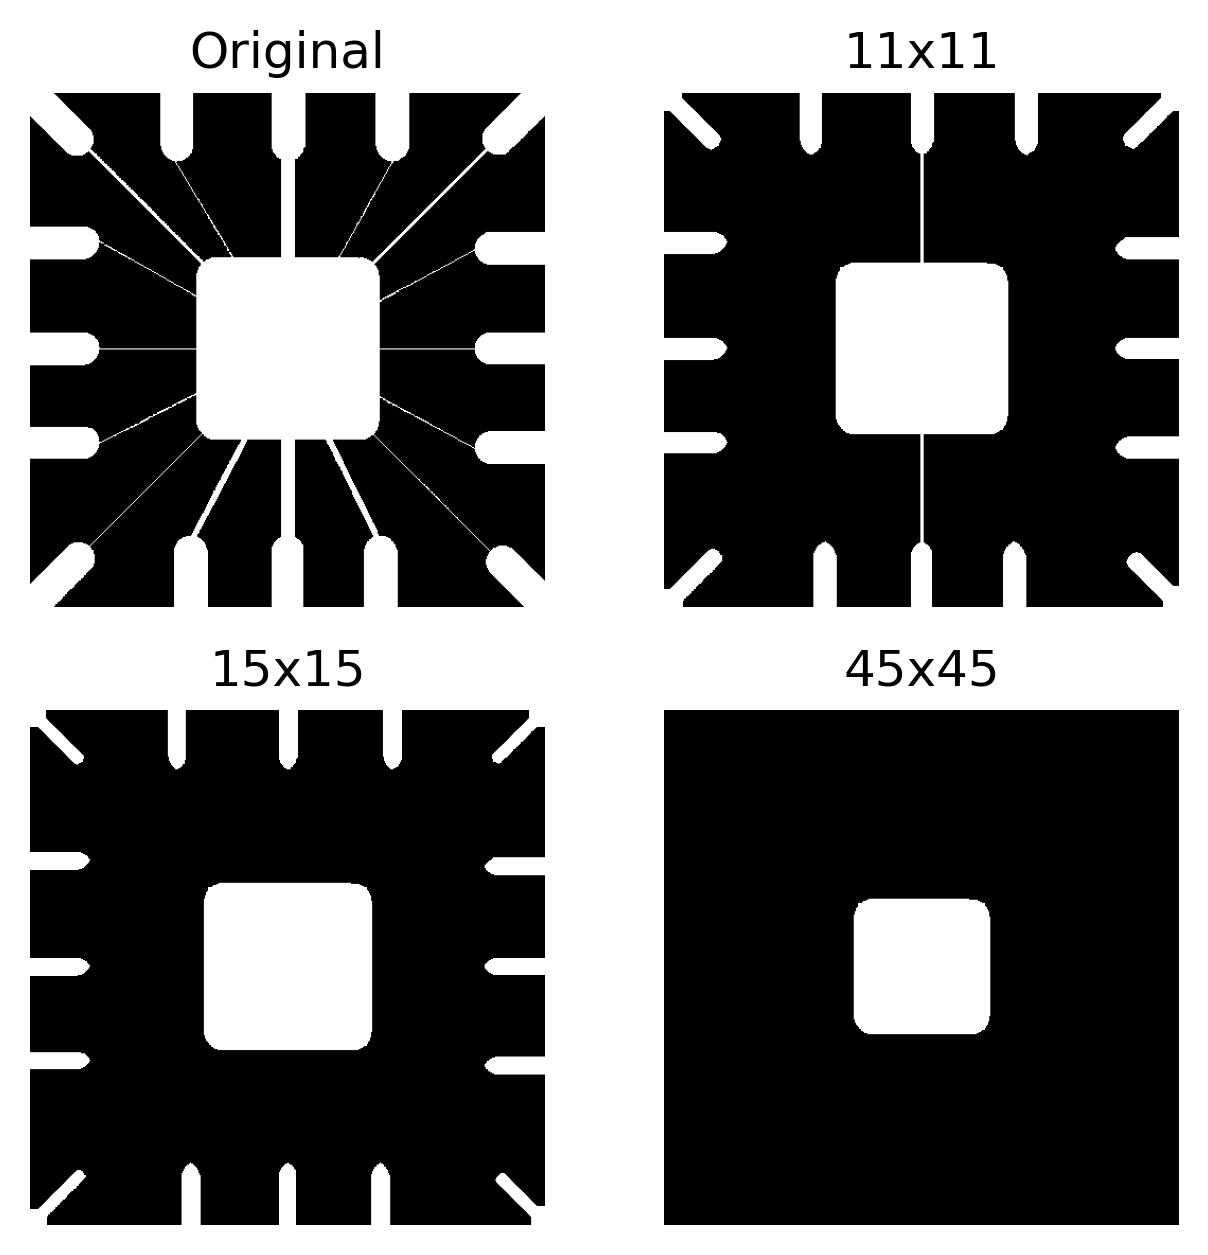

In [ ]:
### La función cv2.erode de OpenCV realiza la erosión de la imagen, usando
### un SE. Toma 2 argumentos y uno opcional.
img0 = cv2.imread('img92a.png')
img2=cv2.cvtColor(img0,cv2.COLOR_BGR2GRAY)
_, img = cv2.threshold(img2,0,255, cv2.THRESH_OTSU)

se11 = np.ones((11,11), np.uint8)
se15 = np.ones((15,15), np.uint8)
se45 = np.ones((45,45), np.uint8)

# El primer argumento es la imagen binaria.
# El segundo argumento es el SE.
# El tercer argumento es opcional y sirve para especificar el número de
# veces que se realizará la erosión.
erosion11 = cv2.erode(img, se11, iterations=1)
erosion15 = cv2.erode(img, se15, iterations=1)
erosion45 = cv2.erode(img, se45, iterations=1)

figure(figsize=(5, 5), dpi=300),
plt.subplot(2,2,1),plt.imshow(img, cmap = 'gray'), plt.title('Original')
plt.axis('off')
plt.subplot(2,2,2),plt.imshow(erosion11, cmap = 'gray'), plt.title('11x11')
plt.axis('off')
plt.subplot(2,2,3),plt.imshow(erosion15, cmap = 'gray'), plt.title('15x15')
plt.axis('off')
plt.subplot(2,2,4),plt.imshow(erosion45, cmap = 'gray'), plt.title('45x45')
plt.axis('off')
plt.show()

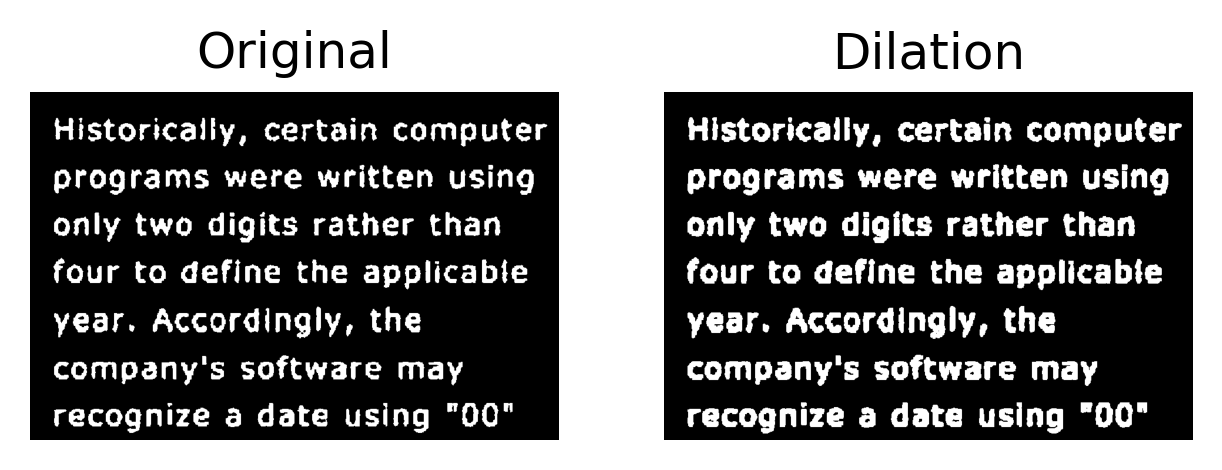

In [ ]:
### La función cv2.dilate de OpenCV realiza la dilatación de la imagen, usando
### un SE. Toma 2 argumentos y uno opcional.

img0 = cv2.imread('img92b.png')
img2=cv2.cvtColor(img0,cv2.COLOR_BGR2GRAY)
_, img = cv2.threshold(img2,0,255, cv2.THRESH_OTSU)

# El primer argumento es la imagen binaria.
# El segundo argumento es el SE.
# El tercer argumento es opcional y sirve para especificar el número de
# veces que se realizará la dilatación. 
kernel = np.ones((3,3), np.uint8)
dilation = cv2.dilate(img, kernel, iterations=1)

figure(figsize=(5, 5), dpi=300),
plt.subplot(1,2,1),plt.imshow(img, cmap = 'gray'), plt.title('Original')
plt.axis('off')
plt.subplot(1,2,2),plt.imshow(dilation, cmap = 'gray'), plt.title('Dilation')
plt.axis('off')
plt.show()

## Opening and closing

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("mariposa.png", 0)    
kernel = np.ones((20, 20), np.uint8)    

In [ ]:
def img_plot(imgs, flag):
  plt.rcParams["figure.figsize"] = (20,8)
  rows = 2
  cols = 5
  axes=[]
  fig=plt.figure()
  for a in range(rows*cols):
      b=imgs[a]
      axes.append( fig.add_subplot(rows, cols, a+1) )
      if flag == 0:
          subplot_title=("Closing " + str(a*10) + "x" + str(a*10))
      else:
          subplot_title=("Opening " + str(a*10) + "x" + str(a*10))
      axes[-1].set_title(subplot_title)  
      plt.imshow(b, cmap="gray")
  fig.tight_layout()    
  plt.show()

In [ ]:
def images(img, type):
  images = []
  for i in range(10):
    kernel = np.ones((i*10, i*10), np.uint8)
    if type == 0:  
      result = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    else:
      result = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    images.append(result)
  return images

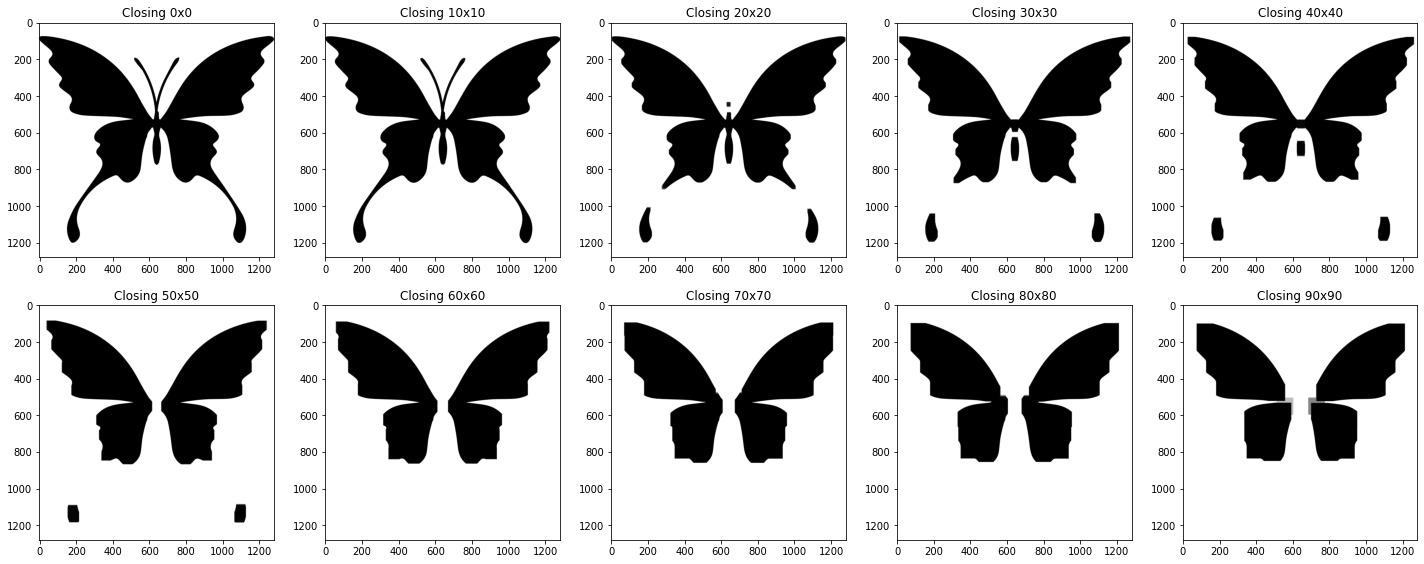

In [ ]:
img_plot(images(img, 0), 0)

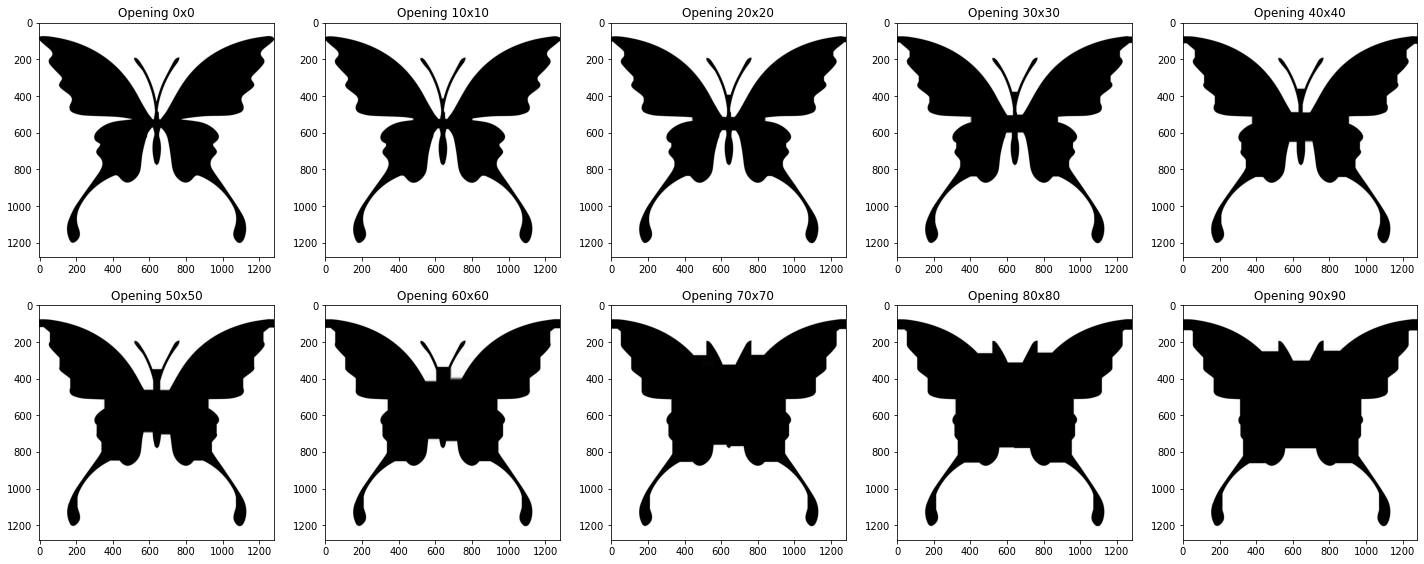

In [ ]:
img_plot(images(img, 1), 1)

## The hit or miss transformation

La transformada HMT es una transformación sobre las imágenes que permite llevar a cabo la detección de formas de una imágen binaria.

In [ ]:
img=np.array([
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,1,1,1,1,0,0,0,0,0,1,1,1,1,0],
[0,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
[0,1,1,1,1,0,1,1,1,0,1,1,1,1,0],
[0,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
[0,1,1,1,1,0,0,0,0,0,1,1,1,1,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]], dtype="uint8")
img2=np.array([
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,1,1,1,1,0,0,0,0,0,1,1,1,1,0],
[0,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
[0,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
[0,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
[0,1,1,1,1,0,0,0,0,0,1,1,1,1,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]], dtype="uint8")

In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
kernel = np.array([
                   [1,1,1],
                   [1,-1,1],
                   [1,1,1]], dtype="int")

### Kernel 1

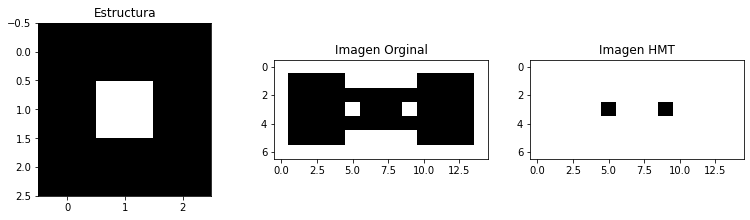

In [ ]:
kernel = np.array([
                   [1,1,1],
                   [1,-1,1],
                   [1,1,1]], dtype="int")
input_image=img
output_image = cv2.morphologyEx(input_image, cv2.MORPH_HITMISS, kernel)
plt.figure(figsize=[13, 7])
plt.subplot(2, 3, 1)
plt.title("Estructura")
plt.imshow(kernel,cmap="binary")
plt.subplot(2, 3, 2)
plt.title("Imagen Orginal")
plt.imshow(input_image,cmap="binary")
plt.subplot(2, 3, 3)
plt.title("Imagen HMT")
plt.imshow(output_image,cmap="binary")
plt.show()

### Kernel 2

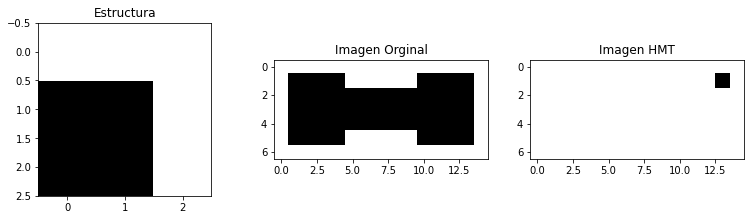

In [ ]:
kernel2 = np.array([
                   [-1,-1,-1],
                   [1,1,-1],
                   [1,1,-1]], dtype="int")
input_image=img2
output_image2 = cv2.morphologyEx(input_image, cv2.MORPH_HITMISS, kernel2)
plt.figure(figsize=[13, 7])
plt.subplot(2, 3, 1)
plt.title("Estructura")
plt.imshow(kernel2,cmap="binary")
plt.subplot(2, 3, 2)
plt.title("Imagen Orginal")
plt.imshow(input_image,cmap="binary")
plt.subplot(2, 3, 3)
plt.title("Imagen HMT")
plt.imshow(output_image2,cmap="binary")
plt.show()

### Kernel 3

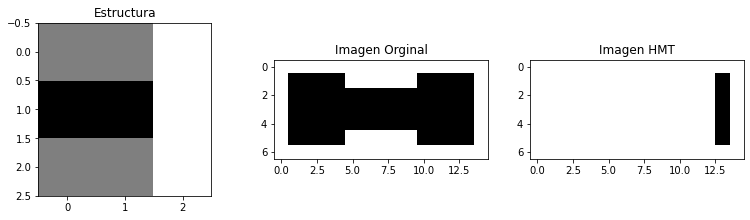

In [ ]:
kernel3 = np.array([
                   [0,0,-1],
                   [1,1,-1],
                   [0,0,-1]], dtype="int")
input_image=img2
output_image3 = cv2.morphologyEx(input_image, cv2.MORPH_HITMISS, kernel3)
plt.figure(figsize=[13, 7])
plt.subplot(2, 3, 1)
plt.title("Estructura")
plt.imshow(kernel3,cmap="binary")
plt.subplot(2, 3, 2)
plt.title("Imagen Orginal")
plt.imshow(input_image,cmap="binary")
plt.subplot(2, 3, 3)
plt.title("Imagen HMT")
plt.imshow(output_image3,cmap="binary")
plt.show()

### Comparativa Kernel 1, 2, 3

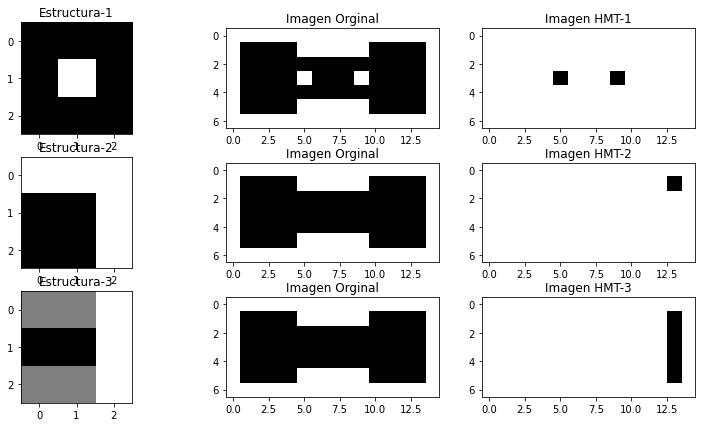

In [ ]:
##########################
plt.figure(figsize=[13, 7])
plt.subplot(3, 3, 1)
plt.title("Estructura-1")
plt.imshow(kernel,cmap="binary")
plt.subplot(3, 3, 2)
plt.title("Imagen Orginal")
plt.imshow(img,cmap="binary")
plt.subplot(3, 3, 3)
plt.title("Imagen HMT-1")
plt.imshow(output_image,cmap="binary")
##########################
plt.subplot(3, 3, 4)
plt.title("Estructura-2")
plt.imshow(kernel2,cmap="binary")
plt.subplot(3, 3, 5)
plt.title("Imagen Orginal")
plt.imshow(input_image,cmap="binary")
plt.subplot(3, 3, 6)
plt.title("Imagen HMT-2")
plt.imshow(output_image2,cmap="binary")
##########################
plt.subplot(3, 3, 7)
plt.title("Estructura-3")
plt.imshow(kernel3,cmap="binary")
plt.subplot(3, 3, 8)
plt.title("Imagen Orginal")
plt.imshow(input_image,cmap="binary")
plt.subplot(3, 3, 9)
plt.title("Imagen HMT-3")
plt.imshow(output_image3,cmap="binary")
###################
plt.show()

# Reconstrucción morfológica

Reconstrucción morfológica con dilatación

In [ ]:
import cv2
import numpy as np
import numpy.matlib
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

# Geodesic dilation

# Marker con los starting points
F = np.zeros((9,9))
F[2,2] = 1
F = F.astype(np.uint8)
# Mask con los constrains
G = np.zeros((9,9))
G[2:4, 2] = 1
G[3:5, 3] = 1
G[5:8, 3:6] = 1
G[6,4] = 0
G = G.astype(np.uint8)

H = np.zeros((9,9))
H[2:4, 2] = 1
H[3:5, 3] = 1
H[5:8, 3:6] = 1
H[6,4] = 0
H = H.astype(np.uint8)

# Structural Element
B = np.ones((3,3), np.uint8)

# Función para calcular la dilatación geodésica
def geodil(marker, mask, se):
  Dil = cv2.dilate(marker, se, iterations=1)
  gd = np.zeros_like(marker)
  for i in range(len(marker)):
    for j in range(len(marker[0])):
      if Dil[i][j] == 1 and mask[i][j] == 1:
        gd[i][j] = 1
  return gd

import copy

# Función para la reconstrucción geodésica por dilatación
def georec_dil(marker, mask, se):
  figure(figsize=(5, 5), dpi=100)
  plt.subplot(2,2,1),plt.imshow(marker, cmap = 'gray'), plt.title('Marker')
  plt.axis('off')
  plt.subplot(2,2,2),plt.imshow(mask, cmap = 'gray'), plt.title('Mask')
  plt.axis('off')
  plt.show()
  

  marker_n_1 = marker
  marker_n = geodil(marker, mask, se)
  
  evol = [copy.deepcopy(marker_n)]

  resta = marker_n - marker_n_1
  while np.count_nonzero(resta) > 0:
    marker_n_1 = copy.deepcopy(marker_n)
    marker_n = geodil(marker_n_1, mask, se)
    
    evol.append(copy.deepcopy(marker_n))
    
    resta = marker_n - marker_n_1
  
  fil = 1 + len(evol) // 3
  figure(figsize=(6, 6), dpi=100)
  for i in range(len(evol)):
    plt.subplot(fil,3,i+1),plt.imshow(evol[i], cmap = 'gray'), plt.title('Marker ' + str(i+1))
    plt.axis('off')
  plt.show()

  return marker_n

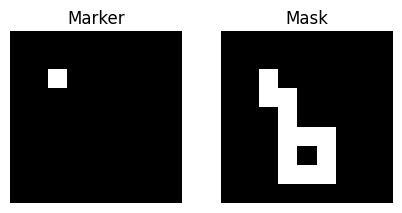

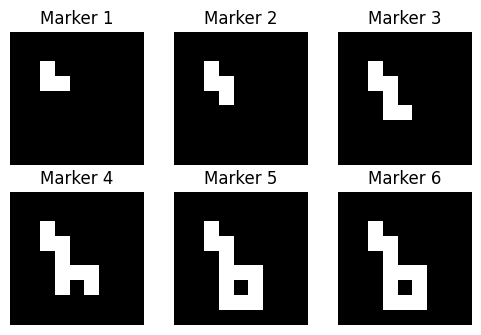

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
georec_dil(F, G, B)

Reconstrucción morfológica con erosión

In [ ]:
# Función para calcular la erosión geodésica
def geoero(marker, mask, se):
  Ero = cv2.erode(marker, se, iterations=1)
  gd = np.zeros_like(marker)
  for i in range(len(marker)):
    for j in range(len(marker[0])):
      if Ero[i][j] == 1 or mask[i][j] == 1:
        gd[i][j] = 1
  return gd

# Función para la reconstrucción geodésica por erosión
def georec_ero(marker, mask, se):
  figure(figsize=(5, 5), dpi=100)
  plt.subplot(2,2,1),plt.imshow(marker, cmap = 'gray'), plt.title('Marker')
  plt.axis('off')
  plt.subplot(2,2,2),plt.imshow(mask, cmap = 'gray'), plt.title('Mask')
  plt.axis('off')
  plt.show()
  

  marker_n_1 = marker
  marker_n = geoero(marker, mask, se)
  
  evol = [copy.deepcopy(marker_n)]

  resta = marker_n - marker_n_1
  while np.count_nonzero(resta) > 0:
    marker_n_1 = copy.deepcopy(marker_n)
    marker_n = geoero(marker_n_1, mask, se)
    
    evol.append(copy.deepcopy(marker_n))
    
    resta = marker_n - marker_n_1
  
  fil = 1 + len(evol) // 3
  figure(figsize=(6, 6), dpi=100)
  for i in range(len(evol)):
    plt.subplot(fil,3,i+1),plt.imshow(evol[i], cmap = 'gray'), plt.title('Marker ' + str(i+1))
    plt.axis('off')
  plt.show()

  return marker_n


In [ ]:
# Marker
F = np.zeros((9,9))
F[1, 1:6] = 1
F[2:4, 1:7] = 1
F[4, 4:7] = 1
F = F.astype(np.uint8)

# Mask con los constrains
G = np.zeros((9,9))
G[2:4, 2] = 1
G[3:5, 3] = 1
G[5:8, 3:6] = 1
G[6,4] = 0
G = G.astype(np.uint8)

H = np.zeros((9,9))
H[2:4, 2] = 1
H[3:5, 3] = 1
H[5:8, 3:6] = 1
H[6,4] = 0
H = H.astype(np.uint8)

# Structural Element
B = np.ones((3,3), np.uint8)

geoero(F, G, B)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

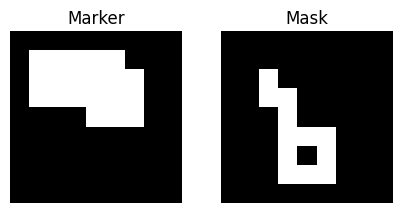

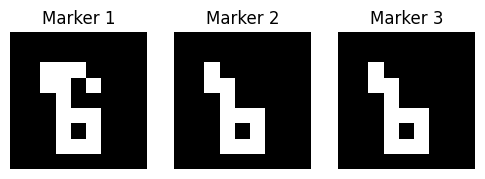

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
georec_ero(F, G, B)

Aplicación: detección de caracteres largos

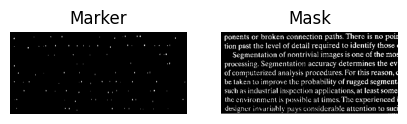

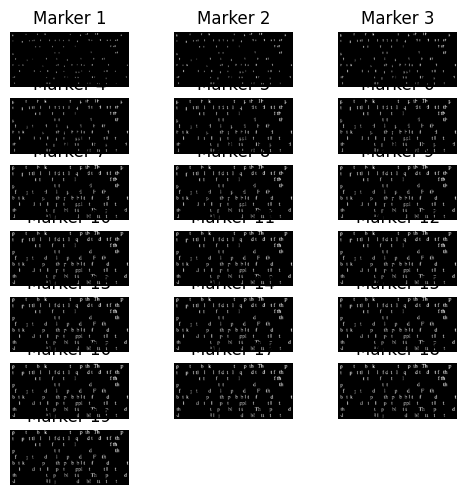

In [ ]:
imgP0 = cv2.imread('fig931a.png')
imgP1=cv2.cvtColor(imgP0,cv2.COLOR_BGR2GRAY)
_, imgP = cv2.threshold(imgP1,0,1, cv2.THRESH_OTSU)

kernel = np.ones((12, 1), np.uint8)

# Erosionar la imagen
ero = cv2.erode(imgP, kernel)

# Reconstruir la imagen por dilatación
SE = np.ones((3, 3), np.uint8)
recons = georec_dil(ero, imgP, SE)

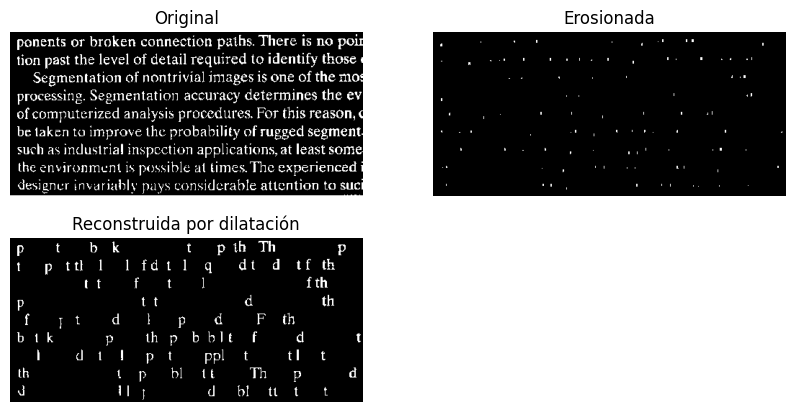

In [ ]:
figure(figsize=(10, 5), dpi=100)
plt.subplot(2,2,1),plt.imshow(imgP, cmap = 'gray'), plt.title('Original')
plt.axis('off')
plt.subplot(2,2,2),plt.imshow(ero, cmap = 'gray'), plt.title('Erosionada')
plt.axis('off')
plt.subplot(2,2,3),plt.imshow(recons, cmap = 'gray'), 
plt.title('Reconstruida por dilatación')
plt.axis('off')
plt.show()

# Boundary Extraction

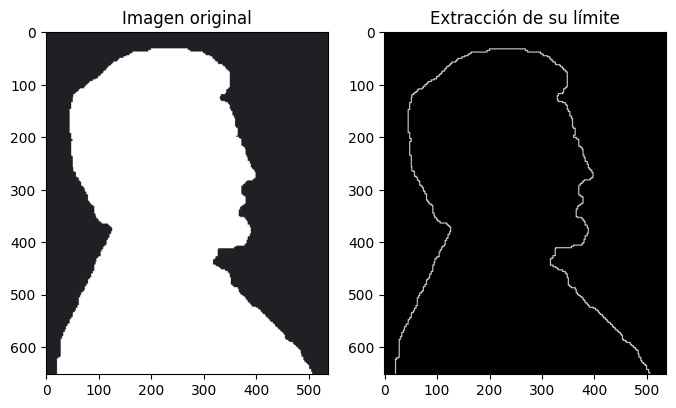

In [ ]:
import cv2 as cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

image=cv2.imread("boundary_extraction.png")
kernel_erode = np.ones((5, 5), np.uint8)
image_eroded = cv2.erode(image,kernel_erode,iterations=1)
image_boundary = image - image_eroded

plt.figure(figsize=(8, 8), dpi=100)

plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title('Imagen original')

plt.subplot(1,2,2), plt.imshow(image_boundary, cmap='gray'), plt.title('Extracción de su límite')

plt.show()

# Hole filling

(<matplotlib.axes._subplots.AxesSubplot at 0x7f657ea2ab90>,
 <matplotlib.image.AxesImage at 0x7f657c5734d0>)

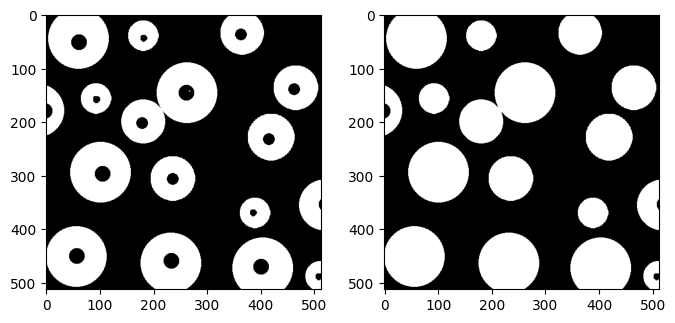

In [ ]:
# Hole Filling
import scipy.ndimage
from matplotlib import pyplot as plt
import scipy.ndimage as sc
from matplotlib.pyplot import figure

imagen = plt.imread("reflections.tif")
im2 = sc.binary_fill_holes(imagen).astype(int)

figure(figsize=(8, 8), dpi=100),
plt.subplot(2,2,1),plt.imshow(imagen, cmap="gray")
plt.subplot(2,2,2),plt.imshow(im2, cmap="gray")

# Extraction of Connected Components

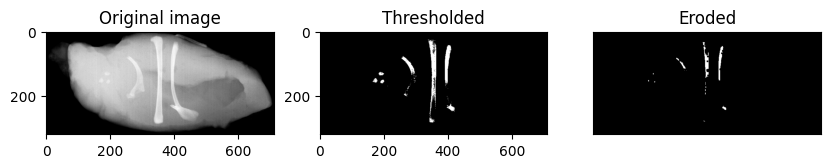

In [ ]:
import cv2
import numpy as np
import random as rnd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure


def get_indx(ref, point):
    for indx, xy in enumerate(zip(ref[0], ref[1])):
        if xy[0] == point[0] and xy[1] == point[1]:
            return indx
    return False


def update_coords(submap, points):
    coords = np.where(submap == 1)
    aux_x = np.array(points[0], copy=True)
    aux_y = np.array(points[1], copy=True)
    aux = tuple((aux_x, aux_y))
    for x, y in zip(coords[0], coords[1]):
        for a, b in zip(aux_x, aux_y):
            if x == a and y == b:
                indx = get_indx(aux, (x, y))
                if indx != False:
                    aux_x = np.delete(aux_x, indx)
                    aux_y = np.delete(aux_y, indx)
                    aux = tuple((aux_x, aux_y))
                    break
    return aux

def not_in_maps(ref, maps):
    for submap in maps:
        if np.array_equiv(ref, submap):
            return False
    return True

imginpt = cv2.imread('chicken_filet.png')
img = cv2.cvtColor(imginpt, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img, 203, 1, cv2.THRESH_BINARY)

kernel = np.ones((5, 5), dtype=np.uint8)
erosion = cv2.erode(thresh, kernel, iterations=1)

points = np.where(erosion == 1)

no_maps = 0
maps = []
computed_map = np.zeros_like(erosion)
while True:
    submap = np.zeros_like(erosion)
    pos = np.random.randint(0, len(points[0]))
    submap[points[0][pos]][points[1][pos]] = 1
    while True:
        submap2 = np.array(submap, copy=True)
        dilation = cv2.dilate(submap2, kernel, iterations=1)
        corrs = np.where((dilation == 1) & (dilation == erosion))
        submap2[corrs] = 1
        if np.array_equiv(submap2, submap):
            submap = np.array(submap2, copy=True)
            break
        else:
            submap = np.array(submap2, copy=True)

    no_maps += 1
    if not_in_maps(submap, maps):
        maps.append(submap)
    coords = np.where(submap == 1)
    computed_map[coords] = 1
    points = update_coords(submap, points)

    if np.array_equiv(computed_map, erosion):
        break


columns = 3

figure(figsize=(10, 10), dpi=100)
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Original image')
plt.subplot(1, 3, 2), plt.imshow(thresh, cmap='gray'), plt.title('Thresholded')
plt.subplot(1, 3, 3), plt.imshow(erosion, cmap='gray'), plt.title('Eroded')
plt.xticks([]), plt.yticks([])
plt.show()


0 674
1 743
2 39
3 11
4 133
5 85
6 9
7 9
8 9
9 1
10 9
11 11
12 11
13 7
14 1


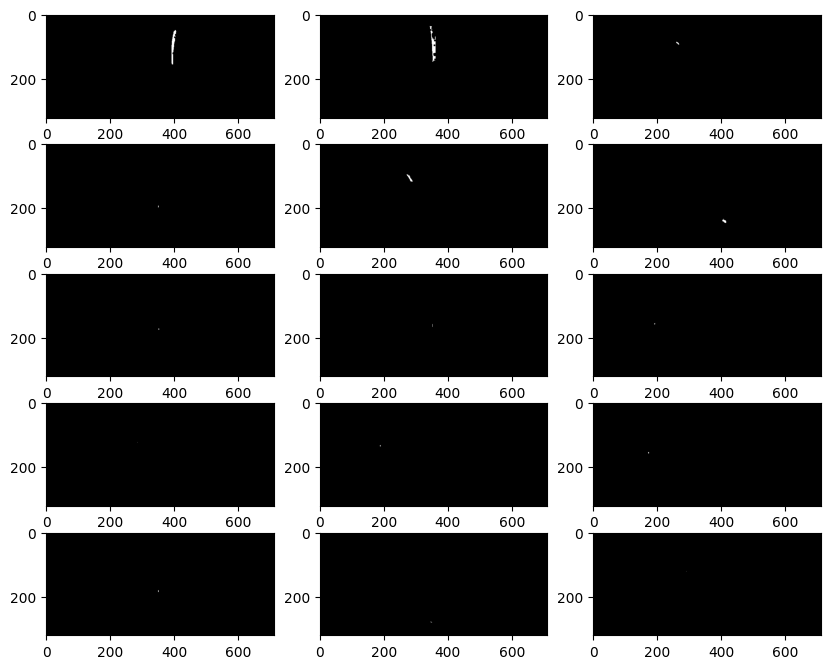

In [ ]:
figure(figsize=(10, 10), dpi=100)
for i, _map in enumerate(maps):
    print(i, np.sum(_map))
    plt.subplot(int(len(maps) / columns + 1), columns, i+1)
    plt.imshow(_map, cmap='gray')
plt.show()

# Convex Hull

(<matplotlib.axes._subplots.AxesSubplot at 0x7f657be6f1d0>,
 (-0.5, 899.5, 459.5, -0.5),
 Text(0.5, 1.0, 'Convex Hull'))

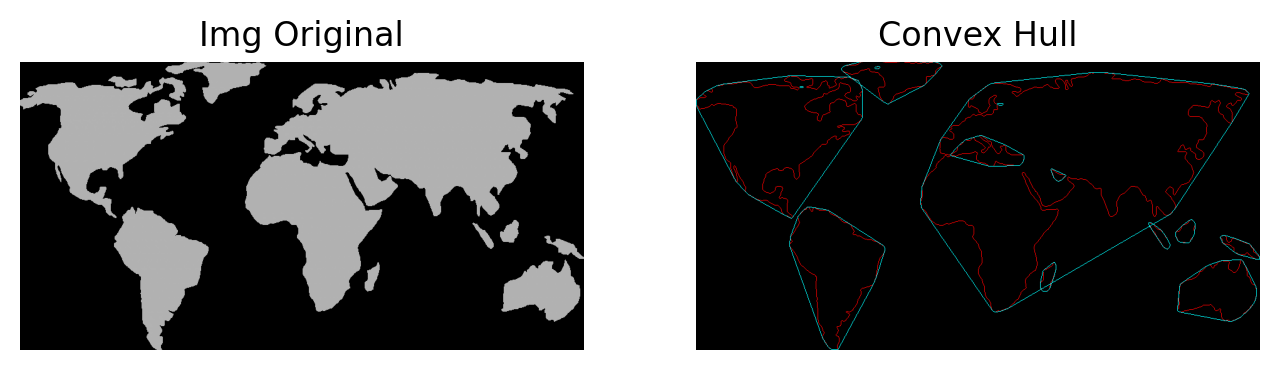

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

srcimg = cv2.imread("world.png", 1)
gray = cv2.cvtColor(srcimg, cv2.COLOR_BGR2GRAY) 
blur = cv2.blur(gray, (3, 3)) 
ret, thresh = cv2.threshold(blur, 50, 255, cv2.THRESH_BINARY)# binarizar
#contornos de la imagen
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

hull = []
#obtener convex hull
for i in range(len(contours)):
  hull.append(cv2.convexHull(contours[i], False))

drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)
color_contours = (255, 0, 0)
color = (0, 255, 255)
#dibujar resultados
for i in range(len(contours)):
  cv2.drawContours(drawing, contours, i, color_contours, 1, 8, hierarchy)
  cv2.drawContours(drawing, hull, i, color, 1, 8)

figure(figsize=(8, 8), dpi=200),
plt.subplot(2,2,1),plt.imshow(srcimg),plt.axis('off'),plt.title('Img Original')
plt.subplot(2,2,2),plt.imshow(drawing),plt.axis('off'),plt.title('Convex Hull')

# Thinning

(<matplotlib.axes._subplots.AxesSubplot at 0x7f657c156fd0>,
 (-0.5, 237.5, 211.5, -0.5),
 Text(0.5, 1.0, 'Thinning'))

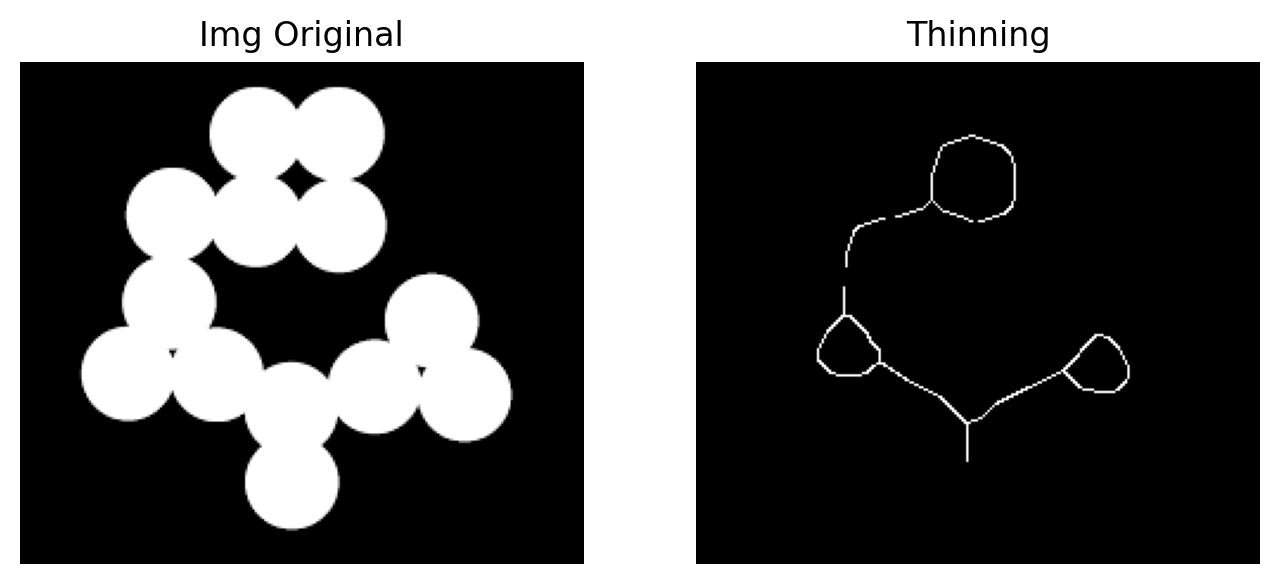

In [ ]:
import cv2
import numpy as np
#leer imagen
imagen = cv2.imread('circulos.png',0)
res,img = cv2.threshold(imagen,60,255,cv2.THRESH_BINARY)
#elemento estructurante
kernel1 = np.array((
        [[-1, -1, -1],
        [0, 1, 0],
        [1, 1, 1]]))
kernel2 = np.array((
        [[0, -1, -1],
        [1, 1, -1],
        [1, 1, 0]]))

kernel3 = np.rot90(kernel1)
kernel4 = np.rot90(kernel2)
kernel5 = np.rot90(kernel3)
kernel6 = np.rot90(kernel4)
kernel7 = np.rot90(kernel5)
kernel8 = np.rot90(kernel6)
skel = np.zeros(imagen.shape,np.uint8)
mask = np.zeros(imagen.shape,np.uint8)
kernels = [kernel1, kernel2, kernel3, kernel4, kernel5, kernel6, kernel7, kernel8]

while (1):
    mask = np.zeros(img.shape,np.uint8)
    for kernel in kernels:
        out_image = cv2.morphologyEx(img, cv2.MORPH_HITMISS, kernel)
        mask = cv2.bitwise_or(out_image, mask)
    img = img - mask
    if (np.array_equal(img, skel)):
        break
    skel = img

figure(figsize=(8, 8), dpi=200),
plt.subplot(2,2,1),plt.imshow(imagen, cmap='gray'),plt.axis('off'),plt.title('Img Original')
plt.subplot(2,2,2),plt.imshow(img, cmap='gray'),plt.axis('off'),plt.title('Thinning')

# Thickening

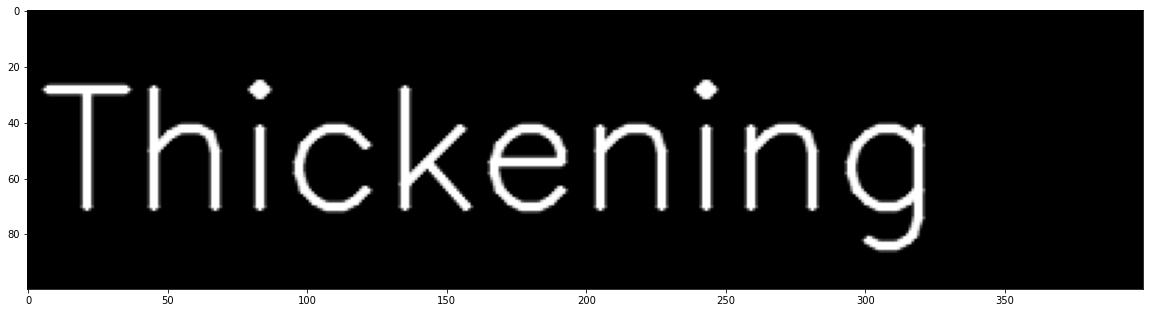

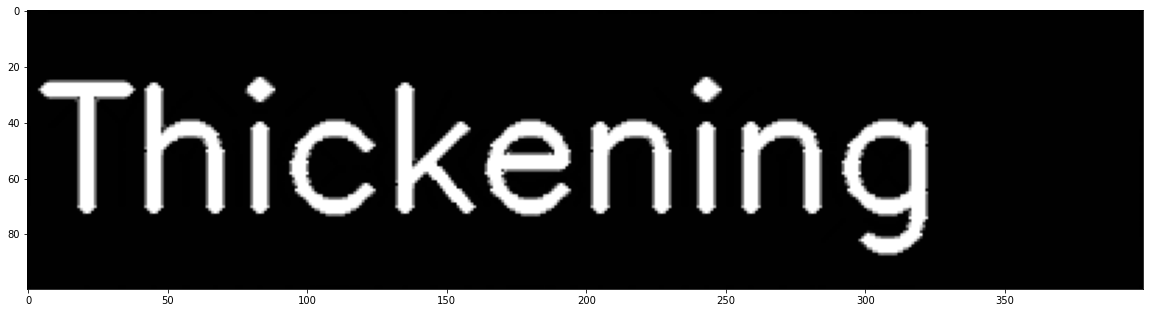

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from skimage.util import invert

# Create una imagen con texto
img = np.zeros((100,400),dtype='uint8') #Matriz de ceros
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'Thickening',(5,70), font, 2,(255),2,cv2.LINE_AA)
img_invert = invert(img)
img1 = img_invert.copy()

# Elemento Estructurante
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
# Crear una imagen vacía
thick = np.zeros(img.shape,dtype='uint8')

# Ciclo hasta que la erosión conduzca a un conjunto vacío

while (cv2.countNonZero(img1)!=0):
    # Erosion
    erode = cv2.erode(img1,kernel)
    # Apertura en imagen erosionada
    opening = cv2.morphologyEx(erode,cv2.MORPH_OPEN,kernel)
    # Suma de ambos
    subset = erode + opening
    # Unión de todos los conjuntos anteriores
    thick = cv2.bitwise_or(subset,thick)
    # Establecer la imagen erosionada para la próxima iteración
    img1 = erode.copy()
    
thick_invert = invert(thick)
plt.imshow(img,cmap="gray") #Imprimir la imagen original
plt.show()
plt.imshow(thick_invert,cmap="gray") #Imprimir la imagen engrosada
plt.show()

# Skeleton

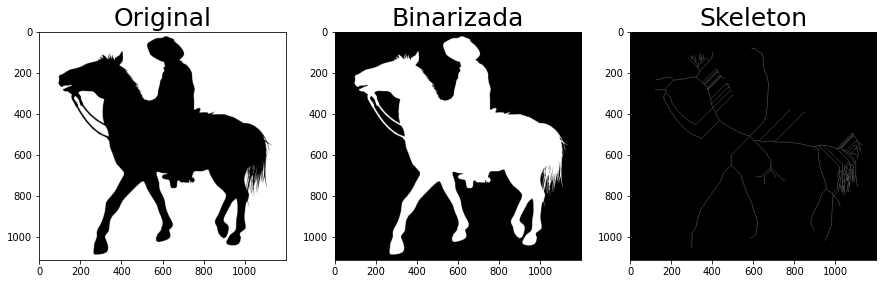

In [ ]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from skimage.util import invert
import cv2

image = cv2.imread('caballo.jpg',0) #Leer la imagen
image_invert = invert(image) #Invertir la imagen (fondo negro)
_,image_bin = cv2.threshold(image_invert, 127, 1, cv2.THRESH_BINARY) #Binarizar la imagen
#skeletonization
skeleton = skeletonize(image_bin, method='lee')

figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(image,cmap="gray")
plt.title("Original",fontdict = {'fontsize' : 25}) #Imprimir imagen original
plt.subplot(1,3,2)
plt.title("Binarizada",fontdict = {'fontsize' : 25}) #Imprimir imagen binarizada
plt.imshow(image_bin,cmap="gray")
plt.subplot(1,3,3)
plt.title("Skeleton",fontdict = {'fontsize' : 25}) #Imprimir skeleton
plt.imshow(skeleton,cmap="gray")
plt.show()

# Pruning

In [ ]:
!pip install plantcv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 285 kB 7.3 MB/s 
     |████████████████████████████████| 40 kB 6.2 MB/s 
     |████████████████████████████████| 1.1 MB 43.7 MB/s 
     |████████████████████████████████| 837 kB 49.7 MB/s 
     |████████████████████████████████| 140 kB 49.5 MB/s 
     |████████████████████████████████| 596 kB 51.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Attempting uninstall: dask
    Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0
  Attempting uninstall: distributed
    Found existing installation: distributed 1.25.3


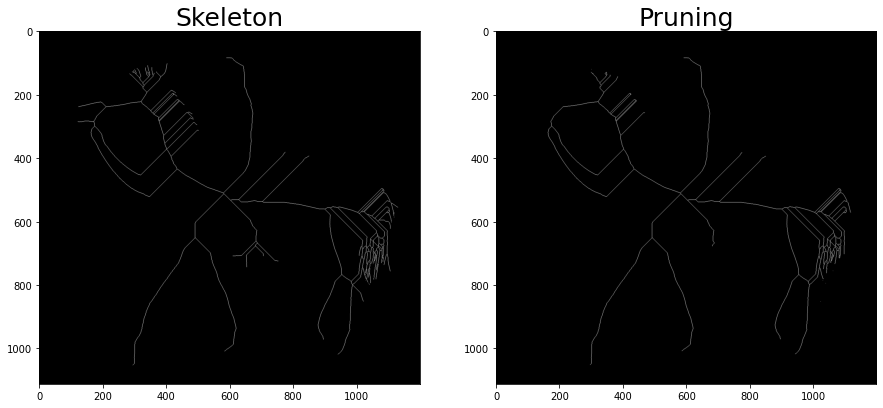

In [ ]:
from plantcv import plantcv as pcv  #Devuelve imagen de skeleton con pruning

#La función elimina las puas de píxeles  más pequeñas de una imagen de esqueleto. 

pruned_skeleton, _, _ = pcv.morphology.prune(skel_img = skeleton, size=200)#el tamaño depende los "parásitos"

figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(skeleton,cmap="gray")
plt.title("Skeleton",fontdict = {'fontsize' : 25})
plt.subplot(1,2,2)
plt.title("Pruning",fontdict = {'fontsize' : 25})
plt.imshow(pruned_skeleton,cmap="gray")
plt.show()

# Morphological reconsctruction

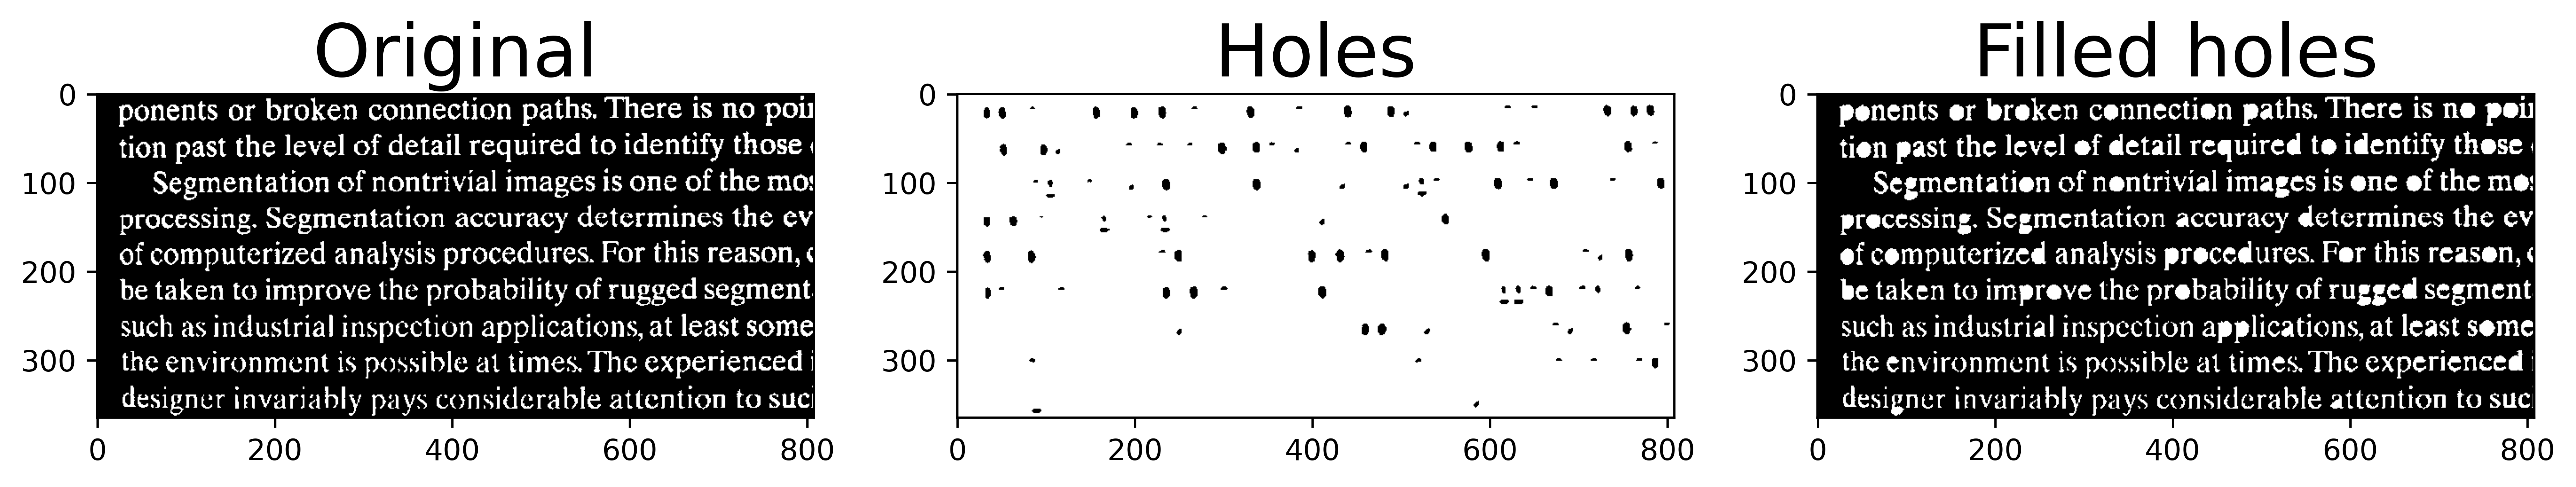

In [ ]:
import matplotlib.pyplot as plt

from skimage.exposure import rescale_intensity
import numpy as np
from skimage.morphology import reconstruction
from matplotlib.pyplot import figure
import cv2

# Lectura de imagen
image = cv2.imread('letras.jpg',0)

# Binarizar imagen
_,image = cv2.threshold(image, 70, 255, cv2.THRESH_BINARY)

# Crear marcador
seed = np.copy(image)
seed[1:-1, 1:-1] = image.max()

# Crear mascara
mask = image

# Aplicar reconstrucción por erosión
filled = reconstruction(seed, mask, method='erosion')

figure(figsize=(15,15), dpi = 600)
plt.subplot(1,3,1)
plt.imshow(image,cmap="gray")
plt.title("Original",fontdict = {'fontsize' : 25})
plt.subplot(1,3,2)
plt.title("Holes",fontdict = {'fontsize' : 25})
plt.imshow(image-filled,cmap="gray")
plt.subplot(1,3,3)
plt.title("Filled holes",fontdict = {'fontsize' : 25})
plt.imshow(filled,cmap="gray")
plt.show()